In [63]:
import pandas as pd
import numpy as np

# Bank Marketing

## Problem Statement

The data is related with **direct marketing campaigns** of a Portuguese banking institution. 

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**This is to analyse based on different data point, wheather a client shuold subscribe a Term Deposit Account.**


In [64]:
df= pd.read_csv(r"C:\Users\$ubhajit\Documents\bank-additional\bank-additional/bank-additional-full.csv",sep = ';')

## Dataset Description

### Attribute Information:

**Bank data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Dataset Size

In [65]:
df.shape

(41188, 21)

Our dataset contains 41,188 records and 21 attributes.

## Dataset Sample

Here's how our dataset looks like

In [66]:
df.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon ...         1    999         0  nonexistent   
1  telephone   may         mon ...         1    999         0  nonexistent   
2  telephone   may         mon ...         1    999         0  nonexistent   
3  telephone   may         mon ...         1    999         0  nonexistent   
4  telephone   may         mon ...         1    999         0  nonexistent   
5  telephone   may         mon ...         1    999         0  nonexistent   
6  telephone   may         mon ...         1    999         0  nonexistent   
7  telephone   may         mon ...         1    999         0  nonexistent   
8  telephone   may         mon ...         1    999         0  nonexistent   
9  telephone   may         mon ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  
7          1.1          93.994          -36.4      4.857       5191.0  no  
8          1.1          93.994          -36.4      4.857       5191.0  no  
9          1.1          93.994          -36.4      4.857       5191.0  no  

[10 rows x 21 columns]

## Univariate Analysis

We look at the statistical summary of all the variables present in our dataset

In [67]:
df.describe(include = 'all').T

count unique                top   freq       mean       std  \
age             41188    NaN                NaN    NaN    40.0241   10.4212   
job             41188     12             admin.  10422        NaN       NaN   
marital         41188      4            married  24928        NaN       NaN   
education       41188      8  university.degree  12168        NaN       NaN   
default         41188      3                 no  32588        NaN       NaN   
housing         41188      3                yes  21576        NaN       NaN   
loan            41188      3                 no  33950        NaN       NaN   
contact         41188      2           cellular  26144        NaN       NaN   
month           41188     10                may  13769        NaN       NaN   
day_of_week     41188      5                thu   8623        NaN       NaN   
duration        41188    NaN                NaN    NaN    258.285   259.279   
campaign        41188    NaN                NaN    NaN    2.56759   2.77001   
pdays           41188    NaN                NaN    NaN    962.475   186.911   
previous        41188    NaN                NaN    NaN   0.172963  0.494901   
poutcome        41188      3        nonexistent  35563        NaN       NaN   
emp.var.rate    41188    NaN                NaN    NaN  0.0818855   1.57096   
cons.price.idx  41188    NaN                NaN    NaN    93.5757   0.57884   
cons.conf.idx   41188    NaN                NaN    NaN   -40.5026    4.6282   
euribor3m       41188    NaN                NaN    NaN    3.62129   1.73445   
nr.employed     41188    NaN                NaN    NaN    5167.04   72.2515   
y               41188      2                 no  36548        NaN       NaN   

                   min     25%     50%     75%     max  
age                 17      32      38      47      98  
job                NaN     NaN     NaN     NaN     NaN  
marital            NaN     NaN     NaN     NaN     NaN  
education          NaN     NaN     NaN     NaN     NaN  
default            NaN     NaN     NaN     NaN     NaN  
housing            NaN     NaN     NaN     NaN     NaN  
loan               NaN     NaN     NaN     NaN     NaN  
contact            NaN     NaN     NaN     NaN     NaN  
month              NaN     NaN     NaN     NaN     NaN  
day_of_week        NaN     NaN     NaN     NaN     NaN  
duration             0     102     180     319    4918  
campaign             1       1       2       3      56  
pdays                0     999     999     999     999  
previous             0       0       0       0       7  
poutcome           NaN     NaN     NaN     NaN     NaN  
emp.var.rate      -3.4    -1.8     1.1     1.4     1.4  
cons.price.idx  92.201  93.075  93.749  93.994  94.767  
cons.conf.idx    -50.8   -42.7   -41.8   -36.4   -26.9  
euribor3m        0.634   1.344   4.857   4.961   5.045  
nr.employed     4963.6  5099.1    5191  5228.1  5228.1  
y                  NaN     NaN     NaN     NaN     NaN

**We observe the following:**

1. Age has a range between 17 to 98. Average age is ~40.

2. Customers having 12 job categories in the dataset and 'admin' is the predominant category. This could be due to usually admin handles company bank account related matters.

3. Most of the customers having university degree.

4. Most of the customers do not have default.

5. MOst of the customers do not have loan.

6. Most of the customers are cellular phone number user.

7. ~50% of the customers having housing loan.

8. ~82% of the costomers do not have personal loan.

9. ~86% are the fresh customers for the banking campaign.


In [68]:
import plotly.express as px

### Age:

Here we are looking at age distribution of targeted users.

In [69]:
df[['age']].describe().T

count      mean       std   min   25%   50%   75%   max
age  41188.0  40.02406  10.42125  17.0  32.0  38.0  47.0  98.0

In [70]:
px.histogram(df , x = 'age')

We can see the **Age** is **Right Skewed** and average age of the targeted users is 40.

We can also observe most of the targeted customers age is between **30 and 40**.

### Job

We are now looking at job types distribution.

In [71]:
df[['job']].describe().T

count unique     top   freq
job  41188     12  admin.  10422

We can see 12 different types of job. Admin job is repeated maximum time.

In [72]:
px.histogram(df , x = 'job')

Admin and blue-collar job holder are maximum among the targeted customers.

We also observe the data information is targeting unemployed and students.

### Marital Status

We look at distribution of Marital status

In [73]:
df[['marital']].describe().T

count unique      top   freq
marital  41188      4  married  24928

In [74]:
px.histogram(df , x = 'marital')

We observe that most of the targeted customers are married **(~60%)** or single **(~28%)**.

### Education

We will look at the distribution of the education among the targeted customers.


In [75]:
df[['education']].describe().T

count unique                top   freq
education  41188      8  university.degree  12168

In [76]:
px.histogram(df , x = 'education')

Most of our targeted customers have either have University degree (~30%) or High school passed (~23%). There are some illiterate users also (only 18) in less numbers.

### Default, Housing Loan, Personal Loan

Here we look whether our targeted users are defaulters , or have a personal/housing loan.

In [77]:
df[['default','housing','loan']].describe().T

count unique  top   freq
default  41188      3   no  32588
housing  41188      3  yes  21576
loan     41188      3   no  33950

#### Defaults

In [78]:
px.histogram(df , x = 'default')

#### Housing Loan



In [79]:
px.histogram(df , x='housing')

#### Personal Loan

In [80]:
px.histogram(df , x='loan')

We can see that most of the targeted Users do not have housing loan, Personal loan. We have also seen that most of the usres are not defaulters.

### Data Processing

We create dummies for the following variables :-

1. Marital
2. Job
3. Education
4. Poutcome (Previous outcome)

In [81]:
df1 = pd.get_dummies(df , columns=['marital','job','education','poutcome'])

In [82]:
df1.head()

age  default housing loan    contact month day_of_week  duration  campaign  \
0   56       no      no   no  telephone   may         mon       261         1   
1   57  unknown      no   no  telephone   may         mon       149         1   
2   37       no     yes   no  telephone   may         mon       226         1   
3   40       no      no   no  telephone   may         mon       151         1   
4   56       no      no  yes  telephone   may         mon       307         1   

   pdays        ...         education_basic.6y  education_basic.9y  \
0    999        ...                          0                   0   
1    999        ...                          0                   0   
2    999        ...                          0                   0   
3    999        ...                          1                   0   
4    999        ...                          0                   0   

   education_high.school  education_illiterate  education_professional.course  \
0                      0                     0                              0   
1                      1                     0                              0   
2                      1                     0                              0   
3                      0                     0                              0   
4                      1                     0                              0   

   education_university.degree education_unknown  poutcome_failure  \
0                            0                 0                 0   
1                            0                 0                 0   
2                            0                 0                 0   
3                            0                 0                 0   
4                            0                 0                 0   

   poutcome_nonexistent  poutcome_success  
0                     1                 0  
1                     1                 0  
2                     1                 0  
3                     1                 0  
4                     1                 0  

[5 rows x 44 columns]

For other variables such as :-

1. Default : if default then 1 else 0
2. Housing : if housing loan then 1 else 0
3. Loan : if personal loan then 1 else 0
4. Contact :if cellular then 1 else 0
We would create them manually based on our understanding

In [83]:
df1['default'] = np.where(df1['default'] == 'yes', 1, 0)
df1['housing'] = np.where(df1['housing'] == 'yes', 1, 0)
df1['loan'] = np.where(df1['loan'] == 'yes', 1, 0)
df1['contact'] = np.where(df1['contact'] == 'cellular', 1, 0)


In [84]:
df1.head()

age  default  housing  loan  contact month day_of_week  duration  campaign  \
0   56        0        0     0        0   may         mon       261         1   
1   57        0        0     0        0   may         mon       149         1   
2   37        0        1     0        0   may         mon       226         1   
3   40        0        0     0        0   may         mon       151         1   
4   56        0        0     1        0   may         mon       307         1   

   pdays        ...         education_basic.6y  education_basic.9y  \
0    999        ...                          0                   0   
1    999        ...                          0                   0   
2    999        ...                          0                   0   
3    999        ...                          1                   0   
4    999        ...                          0                   0   

   education_high.school  education_illiterate  education_professional.course  \
0                      0                     0                              0   
1                      1                     0                              0   
2                      1                     0                              0   
3                      0                     0                              0   
4                      1                     0                              0   

   education_university.degree education_unknown  poutcome_failure  \
0                            0                 0                 0   
1                            0                 0                 0   
2                            0                 0                 0   
3                            0                 0                 0   
4                            0                 0                 0   

   poutcome_nonexistent  poutcome_success  
0                     1                 0  
1                     1                 0  
2                     1                 0  
3                     1                 0  
4                     1                 0  

[5 rows x 44 columns]

In [85]:
df1['y'] = np.where(df1['y'] == 'yes',1 , 0)

In [86]:
import seaborn as sns

## Bivariate Analysis

We look at the dataset from two variable perspective.

First , we look at correlations

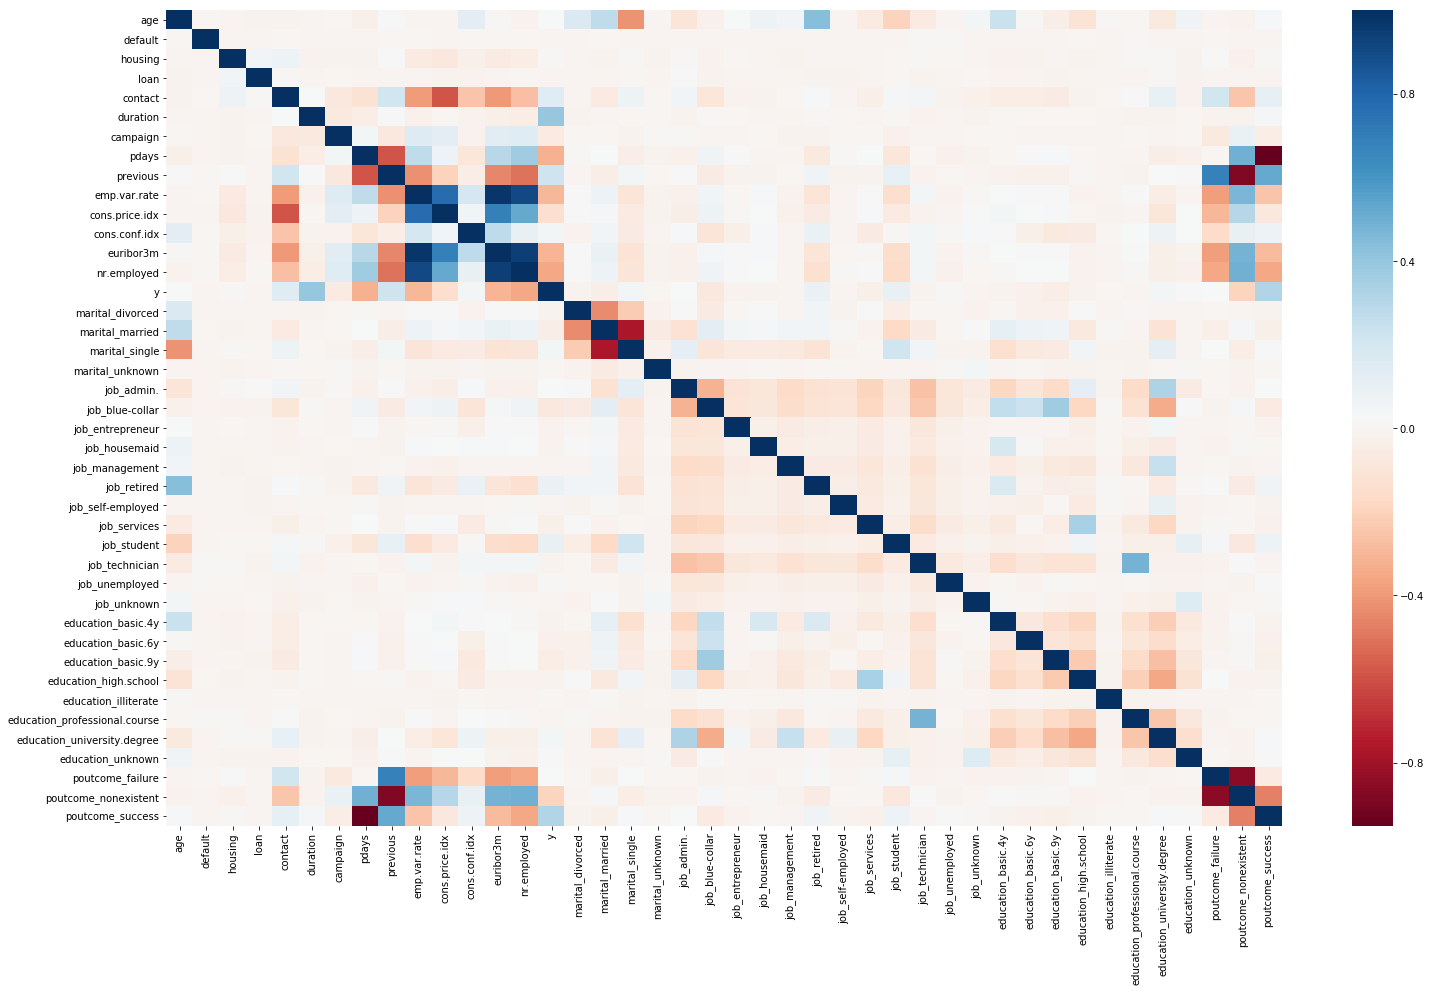

In [87]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (25,15))
sns.heatmap(df1.corr(),cmap='RdBu')